## Importing Necessary Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [46]:
seed = 42

## Loading the data

In [4]:
data = pd.read_csv('../data/cleaned_data.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22,1,0,523,7.2500,47,2
1,2,1,1,190,0,38,1,0,596,71.2833,81,0
2,3,1,3,353,0,26,0,0,669,7.9250,47,2
3,4,1,1,272,0,35,1,0,49,53.1000,55,2
4,5,0,3,15,1,35,0,0,472,8.0500,47,2


In [6]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 83.7 KB


In [7]:
# Statistical describtion
data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.544332,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.013778,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.000000,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


## Checking Data Imbalance

In [ ]:
data.Survived.value_counts() #data imbalance

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
X = data.drop(columns=['PassengerId','Survived'])
y = data['Survived']

In [ ]:
sm = SMOTE(sampling_strategy='minority',random_state=seed)
Xr,yr = sm.fit_resample(X,y)

In [17]:
Xr.shape,data.shape

((1098, 10), (891, 12))

In [37]:
balanced_data = Xr
balanced_data['Survived'] = yr

In [40]:
balanced_data.isna().sum().sum()

0

In [ ]:
balanced_data.Survived.value_counts() #data now is balanced

Survived
0    549
1    549
Name: count, dtype: int64

In [43]:
# saving the balanced data to a csv file
balanced_data.to_csv('../data/balanced_data.csv',index=False)

In [44]:
X = balanced_data.drop(columns=['Survived'])
y = balanced_data['Survived']

## Data splitting (80,20)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

## Random Forest Model

In [ ]:
def performance(model,X_train,X_test,y_train,y_test):
    '''
    Function to plot the performance of a model
    Input arguments:
        initialized model, data(X_train,X_test,y_train,y_test)
    Outputs:
        Performance metrics, Confusion matrix, Classification report
    Returns:
        Trained model
    '''
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f_score = f1_score(y_test,y_pred)

    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['Died','Survived']) #0 = No, 1 = Yes
    
    # performance metrics 
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f_score:.2f}\n")

    # Classifiaction Report
    print('Classification Report')
    print(classification_report(y_test,y_pred))

    # show Confusion matrix and save it
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.savefig("../confusion_matrix.png", bbox_inches='tight')

    return model

Accuracy: 86.36%
Precision: 0.87
Recall: 0.87
F1-Score: 0.87

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       103
           1       0.87      0.87      0.87       117

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



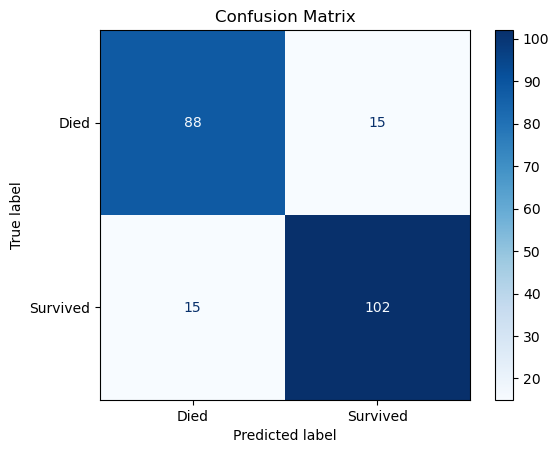

In [89]:
model = RandomForestClassifier(n_estimators=100,random_state=seed)
rf = performance(model,X_train,X_test,y_train,y_test)

## Feature Importance

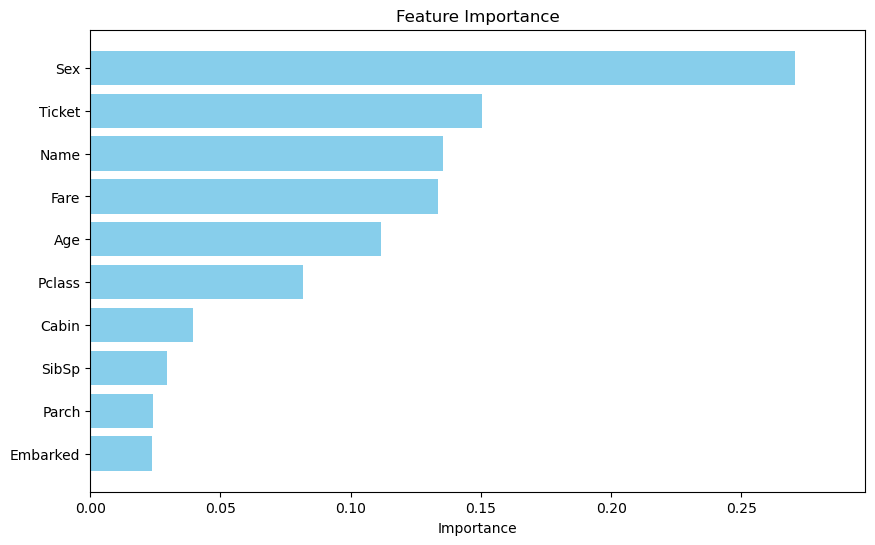

In [110]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = np.array(X.columns)[indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(sorted_feature_names,sorted_importances,color='skyblue',align = 'center')
plt.xlabel('Importance')
plt.xlim([0, max(sorted_importances)*1.1])
plt.gca().invert_yaxis()
plt.show()

## Feature Selection

In [113]:
# selecting only prominent features
selected_features = sorted_feature_names[sorted_importances>0.07]

In [125]:
selected_features

array(['Sex', 'Ticket', 'Name', 'Fare', 'Age', 'Pclass'], dtype=object)

In [115]:
Xs = X[selected_features]
X_train,X_test,y_train,y_test = train_test_split(Xs,y,test_size=0.2,random_state=seed)

Accuracy: 86.82%
Precision: 0.90
Recall: 0.85
F1-Score: 0.87

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       103
           1       0.90      0.85      0.87       117

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



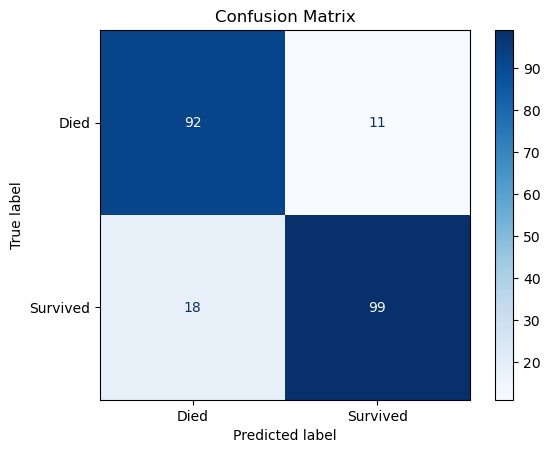

In [116]:
model2 = RandomForestClassifier(n_estimators=100,random_state=seed)
rf_s = performance(model2,X_train,X_test,y_train,y_test)

## Performance Comparison

In [120]:
performance_comparison = pd.DataFrame({
    'models':['model with all features','model with selected features'] ,
    'Accuracy':['86.36%','86.82%'] ,
    'precision':[0.87,0.90],
    'recall' : [0.87,0.85],
    'f1-score':[0.87,0.87]


})
performance_comparison

,models,Accuracy,precision,recall,f1-score
0,model with all features,86.36%,0.87,0.87,0.87
1,model with selected features,86.82%,0.90,0.85,0.87


## Saving the model

In [121]:
import joblib
joblib.dump(rf_s,'../models/saved_model.pkl')

['../models/saved_model.pkl']

## Inference

In [122]:
model3 = joblib.load('../models/saved_model.pkl')

In [123]:
def inference(model,X_test,y_test):
    '''
    Function to plot the performance of a trained model
    Input arguments:
        initialized model, data(X_train,X_test,y_train,y_test)
    Outputs:
        Performance metrics, Confusion matrix, Classification report
    '''
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f_score = f1_score(y_test,y_pred)

    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['Died','Survived']) #0 = No, 1 = Yes
    
    # performance metrics 
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f_score:.2f}\n")

    # Classifiaction Report
    print('Classification Report')
    print(classification_report(y_test,y_pred))

    # show Confusion matrix and save it
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.savefig("../confusion_matrix.png", bbox_inches='tight')


Accuracy: 86.82%
Precision: 0.90
Recall: 0.85
F1-Score: 0.87

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       103
           1       0.90      0.85      0.87       117

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



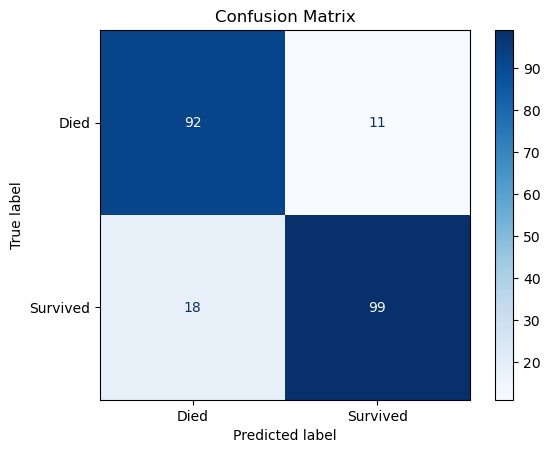

In [124]:
inference(model3,X_test,y_test)